In [1]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

from matplotlib import pyplot as plt

2024-09-10 09:03:27.102302: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load model
model = load_model('../models/facial_emotion_model.keras')

# Load test data
test_images = np.load('../data/processed/test_images.npy')
test_labels = np.load('../data/processed/test_labels.npy')

In [3]:
# Evaluate model
test_images = np.expand_dims(test_images, -1)
model.evaluate(test_images, test_labels)

225/225 [==============================] - 7s 30ms/step - loss: 1.1288 - accuracy: 0.6147


[1.1288360357284546, 0.6146559119224548]

In [4]:
def evaluate_model(test_images, test_labels):
    # Load the pre-trained model
    model = load_model('../models/facial_emotion_model.keras')
    
    # Ensure test_images has shape (batch_size, height, width, channels)
    test_images = np.expand_dims(test_images, -1) if len(test_images.shape) == 3 else test_images
    
    # Predict the emotions
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Print confusion matrix and classification report
    #print("Confusion Matrix")
    #print(confusion_matrix(test_labels, y_pred_classes))
    #print("\nClaasification report")
    #print(classification_report(test_labels, y_pred_classes))
    return confusion_matrix(test_labels, y_pred_classes), classification_report(test_labels, y_pred_classes)

# Evaluate model with test data
cm, classy_report = evaluate_model(test_images, test_labels)

225/225 [==============================] - 8s 33ms/step


In [5]:
cm

array([[ 580,   27,   70,   34,  110,   30,  107],
       [  28,   66,    1,    2,    8,    1,    5],
       [ 204,   11,  364,   25,  162,  123,  135],
       [  83,    8,   31, 1410,   42,   79,  121],
       [ 232,   14,  117,   49,  529,   34,  272],
       [  51,    4,   60,   25,   12,  645,   34],
       [ 151,    9,   51,   63,  118,   23,  818]])

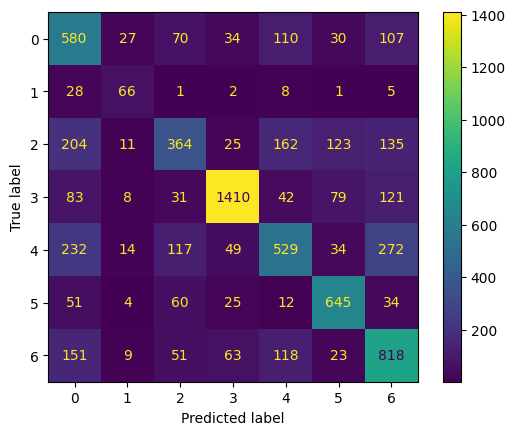

In [6]:
ConfusionMatrixDisplay(cm).plot();

In [7]:
print(classy_report)

              precision    recall  f1-score   support

           0       0.44      0.61      0.51       958
           1       0.47      0.59      0.53       111
           2       0.52      0.36      0.42      1024
           3       0.88      0.79      0.83      1774
           4       0.54      0.42      0.47      1247
           5       0.69      0.78      0.73       831
           6       0.55      0.66      0.60      1233

    accuracy                           0.61      7178
   macro avg       0.58      0.60      0.59      7178
weighted avg       0.62      0.61      0.61      7178

